In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [461]:
pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [462]:
from pyforest import*
lazy_imports()

['from openpyxl import load_workbook',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from scipy import stats',
 'from sklearn.model_selection import GridSearchCV',
 'import lightgbm as lgb',
 'import tensorflow as tf',
 'import glob',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import plotly as py',
 'import re',
 'from PIL import Image',
 'from sklearn.cluster import KMeans',
 'import tqdm',
 'import plotly.graph_objs as go',
 'import statistics',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.preprocessing import OneHotEncoder',
 'import imutils',
 'from sklearn.preprocessing import StandardScaler',
 'import matplotlib as mpl',
 'import pydot',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from dask import dataframe as dd',
 'from sklearn import svm',
 'from sklearn.preprocessing import PolynomialFeatures',
 '

In [463]:
df = pd.read_csv('/content/compresive_strength_concrete+2.csv')

<IPython.core.display.Javascript object>

In [464]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [465]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [466]:
# rename the variable for stay simple

df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
                        'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
                        'Water  (component 4)(kg in a m^3 mixture)':'water',
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":'superplastic',
                        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarseagg',
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
                        'Age (day)':'age',
                        'Concrete compressive strength(MPa, megapascals) ':'strength'
})

df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [467]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [468]:
df.shape

(1030, 9)

In [469]:
# checking missing value
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [470]:
# checking statics describe of each variable

df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [471]:
# gen the q1, q3, IQR
from scipy import stats

q1 = df['cement'].quantile(q = 0.25)
q3 = df['cement'].quantile(q = 0.75)
print('Q1 is :', q1)
print('Q3 is :', q3)
print('IQR is :', stats.iqr(df['cement']))

Q1 is : 192.375
Q3 is : 350.0
IQR is : 157.625


In [472]:
# find outlier threshold via IQR
L_outlier = q1 - 1.5*(q3-q1)
U_outlier = q3 + 1.5*(q3-q1)
print('Lower outlier threshold is :', L_outlier)
print('Upper outlier threshold is :', U_outlier)

Lower outlier threshold is : -44.0625
Upper outlier threshold is : 586.4375


In [473]:
# checking outlier in cement

print('Number of lower outlier in cement:', df[df['cement'] < -44.0625]['cement'].count())
print('Number of upper outlier in cement:', df[df['cement'] > 586.4375]['cement'].count())

Number of lower outlier in cement: 0
Number of upper outlier in cement: 0


<IPython.core.display.Javascript object>

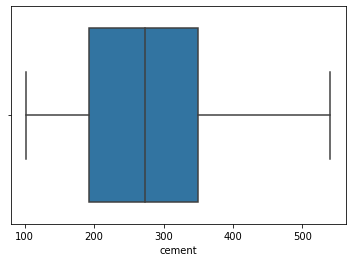

In [474]:
# draw boxplot of cement

sns.boxplot(x = 'cement', data= df, orient = 'h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

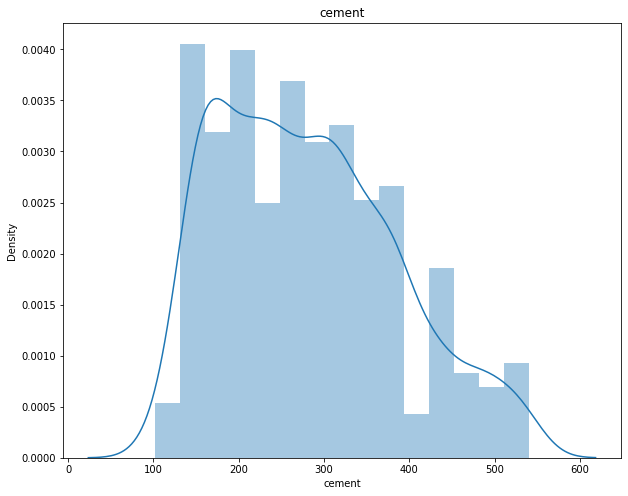

In [475]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['cement']).set_title('cement')
plt.show()

In [476]:
#Quartiles for water

w_Q1=df['water'].quantile(q=0.25)
w_Q3=df['water'].quantile(q=0.75)

print('1st Quartile (Q1) is: ', w_Q1)
print('3rd Quartile (Q3) is: ', w_Q3)
print('Interquartile range (IQR) is: ', stats.iqr(df['water']))

1st Quartile (Q1) is:  164.9
3rd Quartile (Q3) is:  192.0
Interquartile range (IQR) is:  27.099999999999994


In [477]:
#Outlier detection from Interquartile range (IQR) in original data

WL_outliers=w_Q1-1.5*(w_Q3-w_Q1)
WU_outliers=w_Q3+1.5*(w_Q3-w_Q1)

print('Lower outlier in water: ',WL_outliers)
print('Upper outlier in water: ',WU_outliers)

Lower outlier in water:  124.25000000000001
Upper outlier in water:  232.64999999999998


In [478]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in water upper: ', df[df['water']>232.64999999999998]['water'].count())
print('Number of outliers in water lower: ', df[df['water']<124.25000000000001]['water'].count())

Number of outliers in water upper:  4
Number of outliers in water lower:  5


<IPython.core.display.Javascript object>

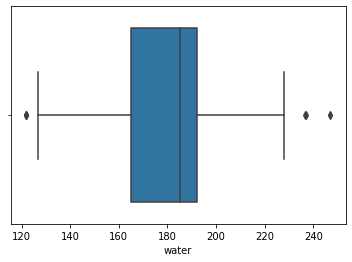

In [479]:
#Distribution of WATER

sns.boxplot(x='water', data=df, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

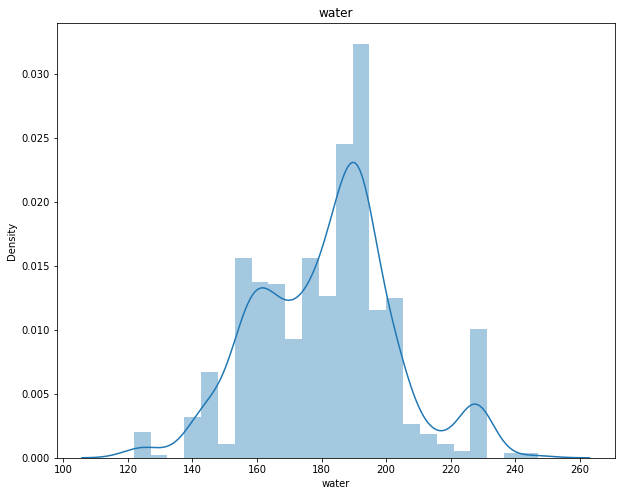

In [480]:
plt.figure(figsize=(10,8))
sns.distplot(df['water']).set_title('water')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


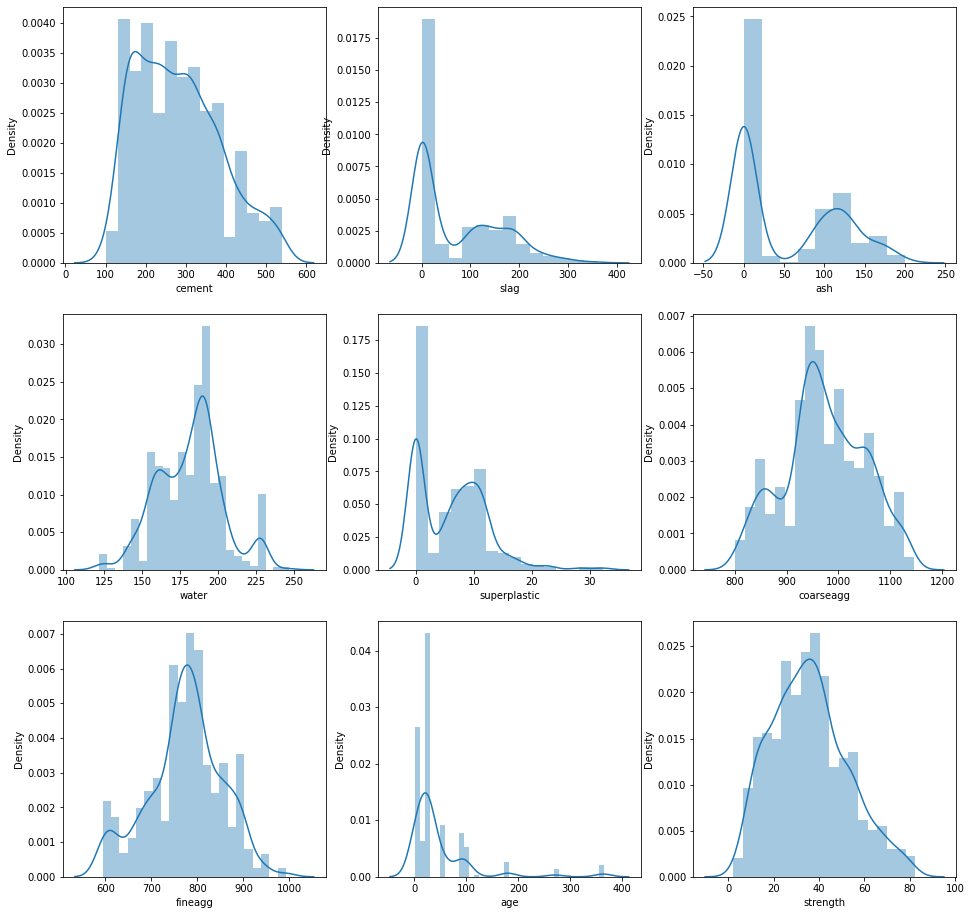

In [481]:
#Displot

fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

<IPython.core.display.Javascript object>

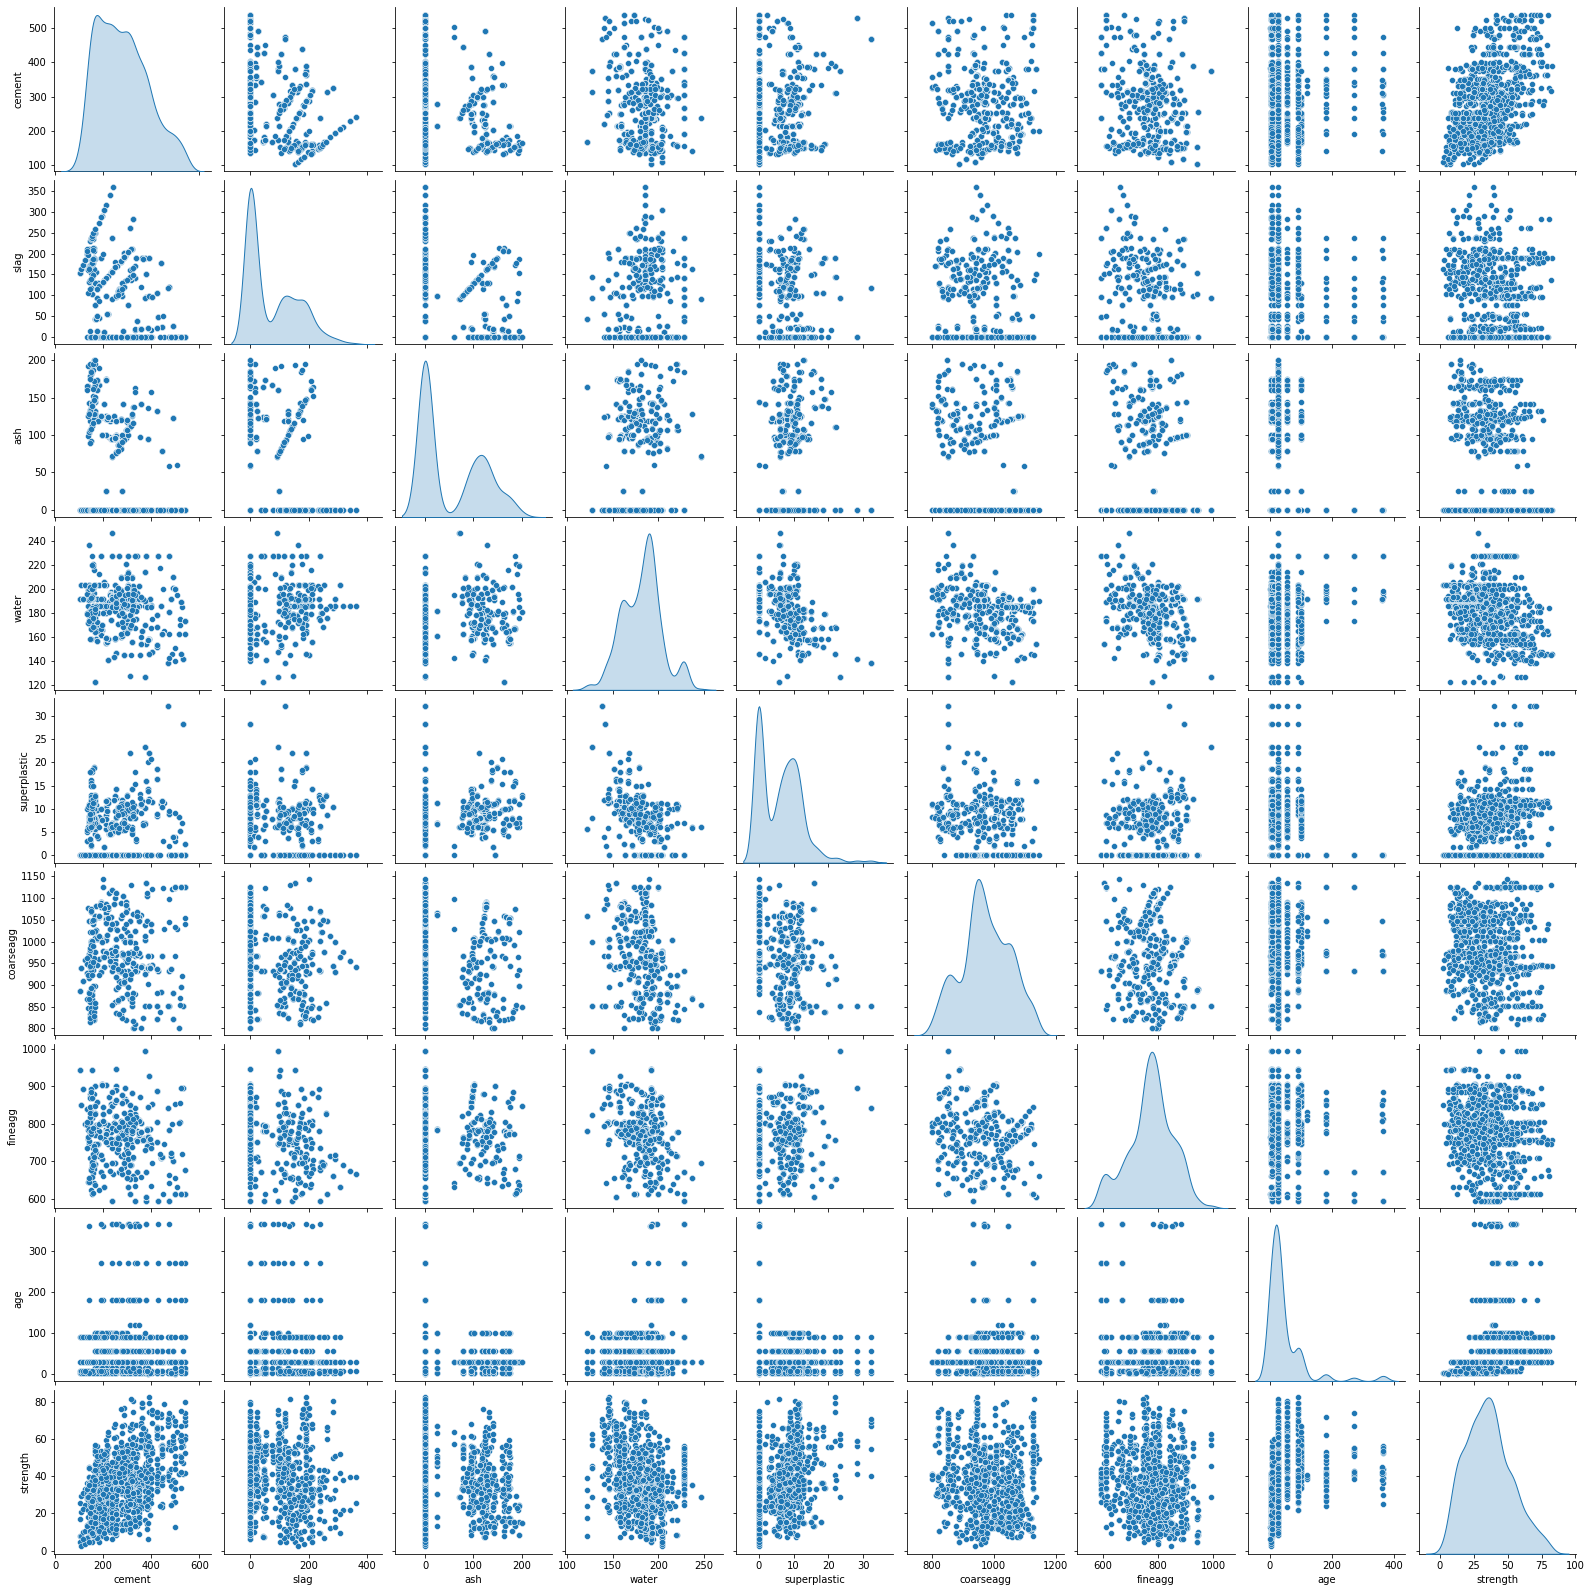

In [482]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(df, diag_kind='kde')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

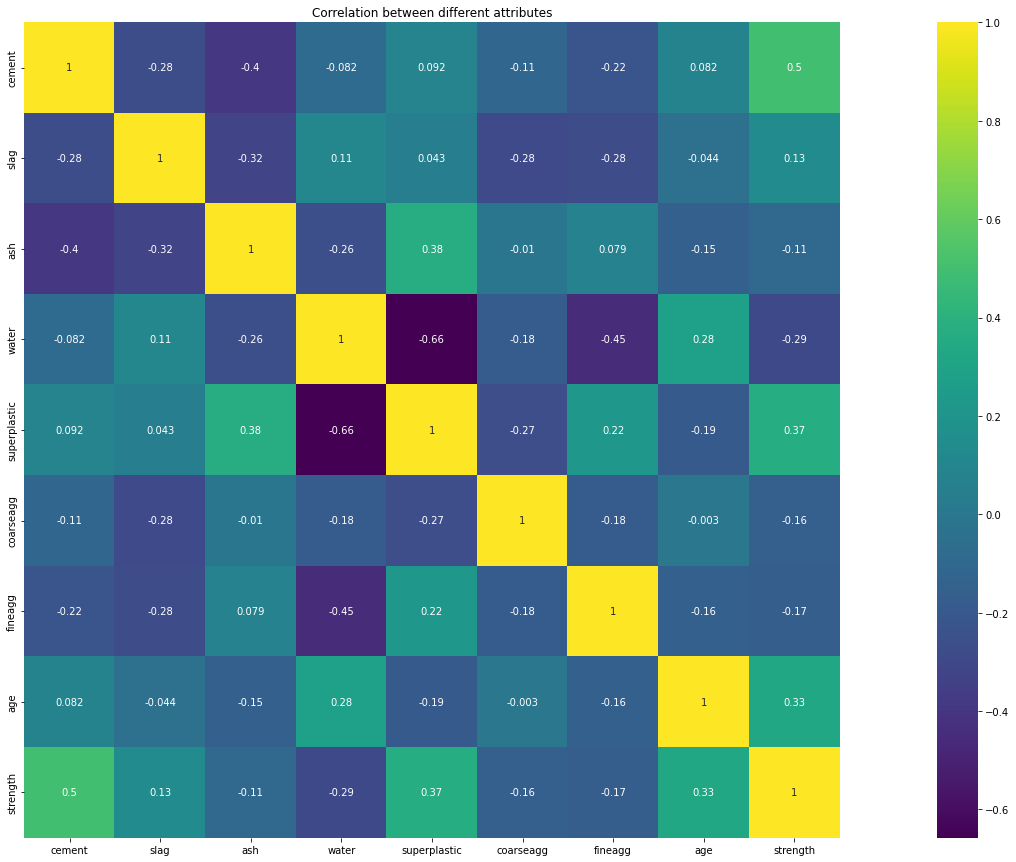

In [483]:
# correlation between variables
plt.figure(figsize=(35,15))

sns.heatmap(df.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

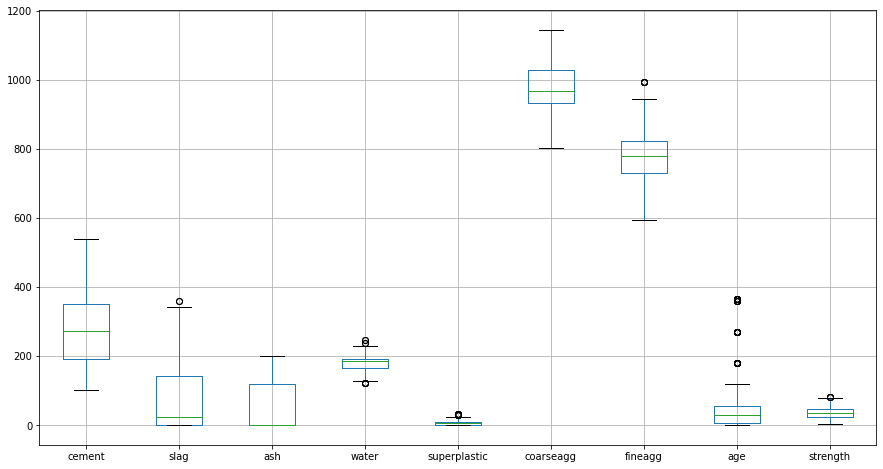

In [484]:
df.boxplot(figsize=(15,8))

In [485]:
# checking outlier

print('Outliers in cement: ', df[((df.cement - df.cement.mean())/df.cement.std()).abs()>3]['cement'].count())
print('Outliers in slag: ', df[((df.slag - df.slag.mean())/df.slag.std()).abs()>3]['slag'].count())
print('Outliers in ash: ', df[((df.ash - df.ash.mean())/df.ash.std()).abs()>3]['ash'].count())
print('Outliers in water: ', df[((df.water - df.water.mean())/df.water.std()).abs()>3]['water'].count())
print('Outliers in superplastic: ', df[((df.superplastic - df.superplastic.mean())/df.superplastic.std()).abs()>3]['superplastic'].count())
print('Outliers in coarseagg: ', df[((df.coarseagg - df.coarseagg.mean())/df.coarseagg.std()).abs()>3]['coarseagg'].count())
print('Outliers in fineagg: ', df[((df.fineagg - df.fineagg.mean())/df.fineagg.std()).abs()>3]['fineagg'].count())
print('Outliers in age: ', df[((df.age - df.age.mean())/df.age.std()).abs()>3]['age'].count())

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplastic:  10
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  33


In [486]:
# replace outlier by mean via IQR
for cols in df.columns[:-1]:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

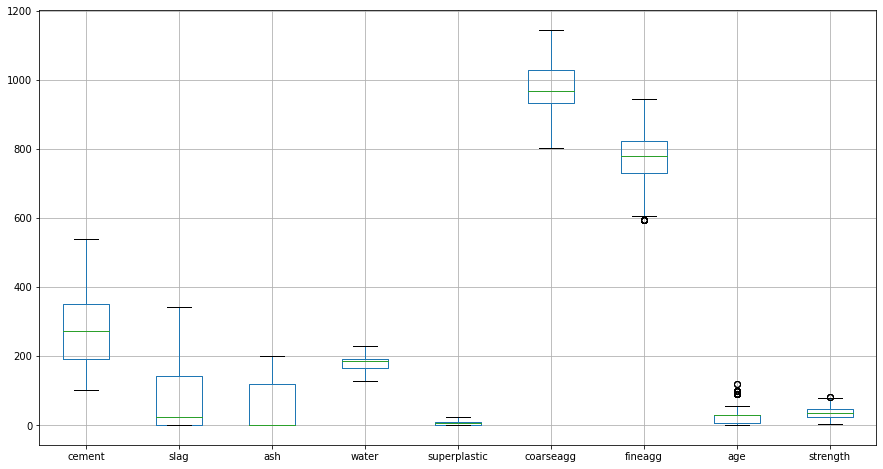

In [487]:
df.boxplot(figsize=(15,8))

In [488]:
#Splitting the data into independent and dependent variables
X = df.drop('strength', axis = 1)
y = df['strength']

In [489]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

<IPython.core.display.Javascript object>

In [490]:
# set up train and test dataset
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size= 0.3, random_state= 1)

<IPython.core.display.Javascript object>

In [491]:
# build different models
# random forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [492]:
y_pred = model.predict(X_test)

In [493]:
#Model Performance on Training Data

model.score(X_train, y_train)

0.9812214099544019

In [494]:
#Model Performance on Test Data

acc_R=model.score(X_test, y_test)
acc_R

0.8785652572748703

In [495]:
# mean squard error
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

31.828920278598574

In [496]:
#Store the accuracy results for each model in a dataframe for final comparison

results_1 = pd.DataFrame({'Algorithm': ['Random Forest'], 'accuracy': acc_R},index={'1'})
results = results_1[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565


In [497]:
# KFold Cross Validation for random forest

k = 20

kfold = KFold(n_splits=k)
K_results = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7567156091537357

In [498]:
#Store the accuracy results for each model in a dataframe for final comparison

random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'accuracy': accuracy},index={'2'})
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716


In [499]:
# Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor()

In [500]:
y_pred = model.predict(X_test)

In [501]:
#Model Performance on Training Data

model.score(X_train, y_train)

0.9477368610390589

In [502]:
#Model Performance on Test Data

acc_G = model.score(X_test, y_test)
acc_G

0.8805736729696695

In [503]:
# mean squard error
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

31.30250006638018

In [504]:
#Store the accuracy results for each model in a dataframe for final comparison

gradient_re = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor'], 'accuracy': acc_G},index={'3'})
results = pd.concat([results, gradient_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574


In [505]:
# KFold Cross Validation for Gradient Boosting Regressor
k = 20

kfold = KFold(n_splits=k,)
results_3 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_3))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7702478732181804

In [506]:
#Store the accuracy results for each model in a dataframe for final comparison

gradient_k = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor k fold'], 'accuracy': accuracy},index={'4'})
results = pd.concat([results, gradient_k])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574
4,Gradient Boost Regressor k fold,0.770248


In [507]:
# Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor

In [508]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [509]:
y_pred = model.predict(X_test)

In [510]:
#Model Performance on train Data
model.score(X_train, y_train)

0.8212915585200002

In [511]:
#Model Performance on Test Data

acc_Ada=model.score(X_test, y_test)
acc_Ada

0.7526667081297338

In [512]:
#Store the accuracy results for each model in a dataframe for final comparison

acc_Ada = pd.DataFrame({'Algorithm': ['Ada Boost Regressor'], 'accuracy': acc_Ada},index={'5'})
results = pd.concat([results, acc_Ada])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574
4,Gradient Boost Regressor k fold,0.770248
5,Ada Boost Regressor,0.752667


In [513]:
# K fold cross Validation for Ada Boost
k = 20

kfold = KFold(n_splits=k)
results_4 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_4))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5881431171666567

In [514]:
#Store the accuracy results for each model in a dataframe for final comparison

acc_AdaC = pd.DataFrame({'Algorithm': ['Ada Boost Regressor k fold'], 'accuracy': accuracy},index={'6'})
results = pd.concat([results, acc_AdaC])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574
4,Gradient Boost Regressor k fold,0.770248
5,Ada Boost Regressor,0.752667
6,Ada Boost Regressor k fold,0.588143


In [515]:
# KNN Regressor
#Checking for different values of neighbors to determine K
from sklearn.neighbors import KNeighborsRegressor


diff_k=[]
for i in range(1,45):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  diff_k.append(np.mean(pred_i != y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean errors')

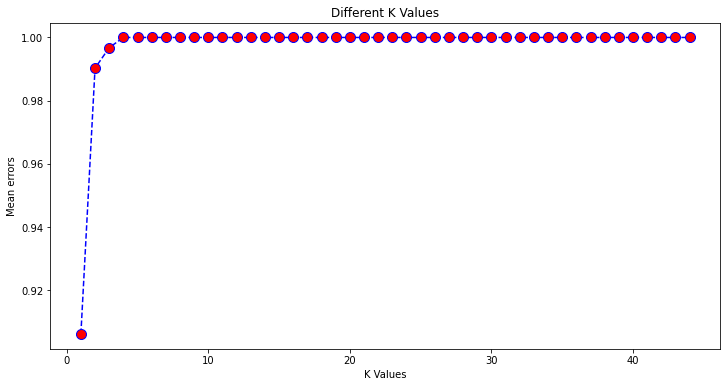

In [516]:
# plot diffenent k values
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [517]:
# set k=3 
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [518]:
y_pred = model.predict(X_test)

In [519]:
# score on train data
model.score(X_train, y_train)

0.9072386489998584

In [520]:
# score on test data
acc_KNN = model.score(X_test, y_test)
acc_KNN

0.7541705172196024

In [521]:
# MSE
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

64.43367716648686

In [522]:
# save results
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [acc_KNN]}, index={'7'})
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574
4,Gradient Boost Regressor k fold,0.770248
5,Ada Boost Regressor,0.752667
6,Ada Boost Regressor k fold,0.588143
7,KNN Regressor,0.754171


In [523]:
# KFold Validation for KNN Regressor
k = 20

kfold = KFold(n_splits=k)
results_5 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_5))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6913851078857276

In [524]:
#Store the accuracy results for each model in a dataframe for final comparison

KNNfold_df = pd.DataFrame({'Algorithm': ['KNN Regressor k fold'], 'accuracy': accuracy},index={'8'})
results = pd.concat([results, KNNfold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574
4,Gradient Boost Regressor k fold,0.770248
5,Ada Boost Regressor,0.752667
6,Ada Boost Regressor k fold,0.588143
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385


In [525]:
# Bagging Reggressor
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor()
model.fit(X_train,y_train)

BaggingRegressor()

In [526]:
y_pred = model.predict(X_test)

In [527]:
# score on train data
model.score(X_train, y_train)

0.9729245644617479

In [528]:
# score on test data
acc_BR=model.score(X_test, y_test)

In [529]:
# MSE
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

35.01810530123308

In [530]:
#Store the accuracy results for each model in a dataframe for final comparison

Bagging_df = pd.DataFrame({'Algorithm': ['Bagging Regressor'], 'accuracy': acc_BR},index={'9'})
results = pd.concat([results, Bagging_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574
4,Gradient Boost Regressor k fold,0.770248
5,Ada Boost Regressor,0.752667
6,Ada Boost Regressor k fold,0.588143
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866398


In [531]:
# KFold Validation for Bagging Reggressor
k = 20

kfold = KFold(n_splits=k)
results_7 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_7))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7377721872004622

In [532]:
#Store the accuracy results for each model in a dataframe for final comparison

BaggingKFold_df = pd.DataFrame({'Algorithm': ['Bagging Regressor k fold'], 'accuracy': accuracy},index={'10'})
results = pd.concat([results, BaggingKFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574
4,Gradient Boost Regressor k fold,0.770248
5,Ada Boost Regressor,0.752667
6,Ada Boost Regressor k fold,0.588143
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866398
10,Bagging Regressor k fold,0.737772


In [533]:
# Support Vector Regressor
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [534]:
y_pred = model.predict(X_test)

In [535]:
# score on train data
model.score(X_train, y_train)

0.7296525761559518

In [536]:
# score on test data
acc_SVR=metrics.r2_score(y_test, y_pred)
acc_SVR

<IPython.core.display.Javascript object>

0.6549962611822544

In [537]:
# MSE
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

90.42796363067555

In [538]:
#Store the accuracy results for each model in a dataframe for final comparison

SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': acc_SVR},index={'11'})
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574
4,Gradient Boost Regressor k fold,0.770248
5,Ada Boost Regressor,0.752667
6,Ada Boost Regressor k fold,0.588143
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866398
10,Bagging Regressor k fold,0.737772


In [539]:
# KFold for SVR
k = 20

kfold = KFold(n_splits=k)
results_8 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_8))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6155301658292511

In [540]:
#Store the accuracy results for each model in a dataframe for final comparison

SVRKFold_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor k fold'], 'accuracy': accuracy},index={'12'})
results = pd.concat([results, SVRKFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574
4,Gradient Boost Regressor k fold,0.770248
5,Ada Boost Regressor,0.752667
6,Ada Boost Regressor k fold,0.588143
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866398
10,Bagging Regressor k fold,0.737772


In [541]:
# XGBoost Regressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor()

xgr.fit(X_train, y_train)

[07:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [542]:
y_pred = xgr.predict(X_test)

In [543]:
# score on train
xgr.score(X_train, y_train)

0.9441437766049378

In [544]:
# score on test
acc_XGB=metrics.r2_score(y_test, y_pred)
acc_XGB

<IPython.core.display.Javascript object>

0.8818060857485882

In [545]:
# MSE
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

30.979475804869445

In [546]:
#Store the accuracy results for each model in a dataframe for final comparison

XGB_df = pd.DataFrame({'Algorithm': ['XGBoost Regressor'], 'accuracy': [acc_XGB]},index={'13'})
results = pd.concat([results, XGB_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574
4,Gradient Boost Regressor k fold,0.770248
5,Ada Boost Regressor,0.752667
6,Ada Boost Regressor k fold,0.588143
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866398
10,Bagging Regressor k fold,0.737772


In [547]:
# KFold for XGBoost Regressor
k = 20

kfold = KFold(n_splits=k)
results_9 = cross_val_score(xgr, X, y, cv=kfold)
accuracy=np.mean(abs(results_9))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[07:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

<IPython.core.display.Javascript object>

0.762867221636569

In [548]:
#Store the accuracy results for each model in a dataframe for final comparison

DCT_df = pd.DataFrame({'Algorithm': [' XGBoost Regressor k fold'], 'accuracy': accuracy},index={'14'})
results = pd.concat([results, DCT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574
4,Gradient Boost Regressor k fold,0.770248
5,Ada Boost Regressor,0.752667
6,Ada Boost Regressor k fold,0.588143
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866398
10,Bagging Regressor k fold,0.737772


In [549]:
# DesionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [550]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=X_train.columns))
# As we can see, Cement, Age and Water are the most important features

<IPython.core.display.Javascript object>

Feature importance: 
               Importance
cement          0.308872
slag            0.058991
ash             0.009866
water           0.122053
superplastic    0.048974
coarseagg       0.028441
fineagg         0.049829
age             0.372974


In [551]:
y_pred = dec_model.predict(X_test)

In [552]:
# score on train
dec_model.score(X_train, y_train)

0.9930841416603411

In [553]:
acc_DT=metrics.r2_score(y_test, y_pred)
acc_DT

<IPython.core.display.Javascript object>

0.7434518179331717

In [554]:
#Store the accuracy results for each model in a dataframe for final comparison

DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 1'], 'accuracy': [acc_DT]},index={'15'})
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574
4,Gradient Boost Regressor k fold,0.770248
5,Ada Boost Regressor,0.752667
6,Ada Boost Regressor k fold,0.588143
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866398
10,Bagging Regressor k fold,0.737772


In [555]:
# KFold for Decision Tree Regressor 1
k = 20

kfold = KFold(n_splits=k)
results_10 = cross_val_score(dec_model, X, y, cv=kfold)
accuracy=np.mean(abs(results_9))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.762867221636569

In [556]:
#Store the accuracy results for each model in a dataframe for final comparison

DCT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 1 k fold'], 'accuracy': accuracy},index={'16'})
results = pd.concat([results, DCT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574
4,Gradient Boost Regressor k fold,0.770248
5,Ada Boost Regressor,0.752667
6,Ada Boost Regressor k fold,0.588143
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866398
10,Bagging Regressor k fold,0.737772


In [557]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
               Importance
cement          0.308872
slag            0.058991
ash             0.009866
water           0.122053
superplastic    0.048974
coarseagg       0.028441
fineagg         0.049829
age             0.372974


In [558]:
# select some variable for DesionTreeRegressor
#create a copy of df in order to drop the least important features and work on only the important features
df2 = df.copy() 
X = df2.drop(['strength','ash','coarseagg','fineagg'],axis=1)
y = df2['strength']
#Split the X and y into training and test set in 70:30 ratio
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

In [559]:
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [560]:
decNew_Model = DecisionTreeRegressor()
decNew_Model.fit(X_train, y_train)

DecisionTreeRegressor()

In [561]:
decNew_Model.score(X_train, y_train)

0.9911889880235539

In [562]:
acc_DT=decNew_Model.score(X_test, y_test)
acc_DT

0.7385651906127869

In [563]:
#Store the accuracy results for each model in a dataframe for final comparison

DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2'], 'accuracy': [acc_DT]},index={'17'})
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574
4,Gradient Boost Regressor k fold,0.770248
5,Ada Boost Regressor,0.752667
6,Ada Boost Regressor k fold,0.588143
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866398
10,Bagging Regressor k fold,0.737772


In [564]:
# KFold for Decision Tree Regressor 2
k = 20

kfold = KFold(n_splits=k)
results_11 = cross_val_score(decNew_Model, X, y, cv=kfold)
accuracy=np.mean(abs(results_9))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.762867221636569

In [565]:
#Store the accuracy results for each model in a dataframe for final comparison

DCT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2 k fold'], 'accuracy': accuracy},index={'18'})
results = pd.concat([results, DCT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.878565
2,Random Forest Regressor k_fold,0.756716
3,Gradient Boost Regressor,0.880574
4,Gradient Boost Regressor k fold,0.770248
5,Ada Boost Regressor,0.752667
6,Ada Boost Regressor k fold,0.588143
7,KNN Regressor,0.754171
8,KNN Regressor k fold,0.691385
9,Bagging Regressor,0.866398
10,Bagging Regressor k fold,0.737772


In [566]:
# Random Forest, Gradient Boost Regressor, Bagging Regressor and XGBoost Regressor seems our best choices 